In [212]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt

#load data
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_iris()

x_data = data.data
y_data = data.target

#choose first 100 entries
x_data = x_data[:100]
y_data = y_data[:100]

#split data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.8, random_state=0)


1. Implement binary linear classifier on the first two dimensions.

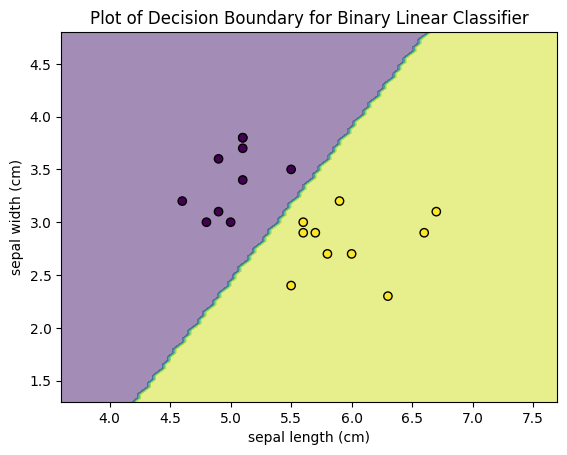

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

#create new dataset with first two dimensions
x_train2d = np.array([i[:2] for i in x_train])
x_test2d = np.array([i[:2] for i in x_test])

#train model
linear_model = LogisticRegression().fit(x_train2d, y_train)

#plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(linear_model, x_train2d, response_method='predict', xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)
disp.ax_.scatter(x_train2d[:,0], x_train2d[:,1], c=y_train, edgecolors='k')
plt.title("Plot of Decision Boundary for Binary Linear Classifier")
plt.show()

2. Report accuracy on training and test set.

In [214]:
from sklearn.metrics import accuracy_score

#compute training accuracy
y_pred = linear_model.predict(x_train2d)
train_score = accuracy_score(y_train, y_pred)

#compute test accuracy
y_pred = linear_model.predict(x_test2d)
test_score = accuracy_score(y_test, y_pred)

#print values
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 1.0
Test Accuracy: 0.9875


3. Implement linear SVM classifier.

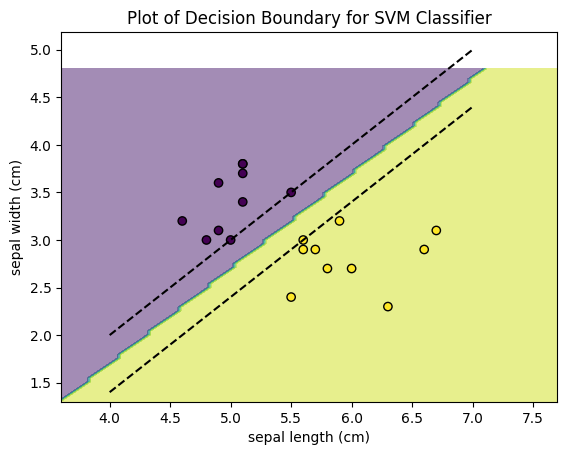

In [215]:
from sklearn.svm import SVC

#train model
#choose large C for hard-margin
svm_model = SVC(kernel='linear', C=2**32).fit(x_train2d, y_train)

#plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(svm_model, x_train2d, response_method='predict', xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)
disp.ax_.scatter(x_train2d[:,0], x_train2d[:,1], c=y_train, edgecolors='k')

#plot margin
w = svm_model.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(4, 7)
yy = a * xx - (svm_model.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(svm_model.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.title("Plot of Decision Boundary for SVM Classifier")
plt.show()

4. Circle the support vectors. Justify how to identify them through the duality theorem.

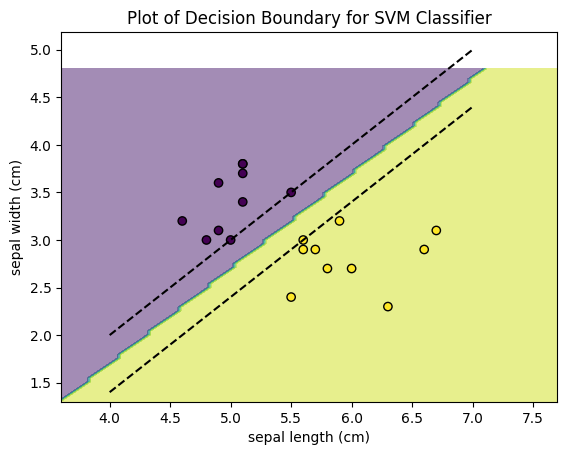

Support vectors:
[[5.  3. ]
 [5.5 3.5]
 [5.6 3. ]]


In [216]:
#Replot and circle
#plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(svm_model, x_train2d, response_method='predict', xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)
disp.ax_.scatter(x_train2d[:,0], x_train2d[:,1], c=y_train, edgecolors='k')

#plot margin
w = svm_model.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(4, 7)
yy = a * xx - (svm_model.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(svm_model.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.title("Plot of Decision Boundary for SVM Classifier")
plt.show()

print("Support vectors:")
print(svm_model.support_vectors_)

Using the KKT condition, for support vectors, alpha_i are non-zero so they rest on the margins.

5. Report the accuracy of your linear SVM classifier on both the training and test sets.

In [217]:
#compute accuracy
#compute training accuracy
y_pred = svm_model.predict(x_train2d)
train_score = accuracy_score(y_train, y_pred)

#compute test accuracy
y_pred = svm_model.predict(x_test2d)
test_score = accuracy_score(y_test, y_pred)

#print values
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 1.0
Test Accuracy: 1.0


6. What is the value of the margin?

Margin is defined by c = 1/norm(w).
We can get values for the vector w from the model itself.

In [218]:
c = 1/np.linalg.norm(svm_model.coef_)
print("Value of Margin:", 2*c)

Value of Margin: 0.42430075463962574


7. Which vector is orthogonal to the decision boundary?

For a hyperplane of the form wx + b = 0, vector w is orthogonal to the hyperplane.

In [219]:
print("Orthogonal vector to the decision boundary/hyperplane:", svm_model.coef_[0])

Orthogonal vector to the decision boundary/hyperplane: [ 3.33266363 -3.33342658]


8. Split the iris dataset again with test_size = 0.4. Train the SVM classifier again. Does the decision boundary change? How about the test accuracy? Please justify why, and illustrate yoru argument with a new plot.

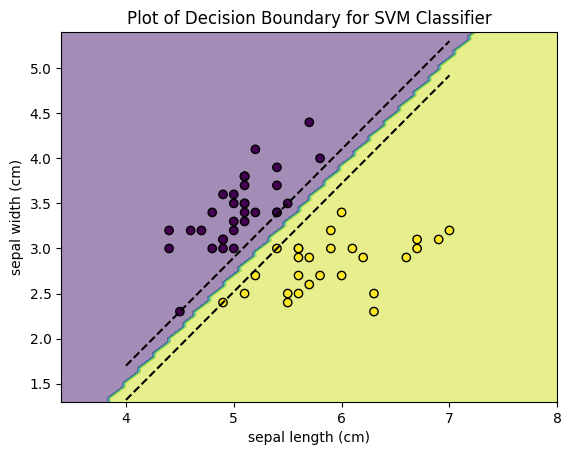

Orthogonal vector to the decision boundary/hyperplane: [ 6.31804679 -5.26503723]
Training Accuracy: 1.0
Test Accuracy: 1.0
Support vectors:
[[4.5 2.3]
 [5.5 3.5]
 [4.9 2.4]
 [5.4 3. ]]
Value of Margin: 0.24318318953945936


In [220]:
#Create new data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

x_train2d = np.array([i[:2] for i in x_train])
x_test2d = np.array([i[:2] for i in x_test])

#train model
#choose large C for hard-margin
svm_model = SVC(kernel='linear', C=2**32).fit(x_train2d, y_train)

#plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(svm_model, x_train2d, response_method='predict', xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)
disp.ax_.scatter(x_train2d[:,0], x_train2d[:,1], c=y_train, edgecolors='k')

#plot margin
w = svm_model.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(4, 7)
yy = a * xx - (svm_model.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(svm_model.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.title("Plot of Decision Boundary for SVM Classifier")
plt.show()

print("Orthogonal vector to the decision boundary/hyperplane:", svm_model.coef_[0])

#compute accuracy
#compute training accuracy
y_pred = svm_model.predict(x_train2d)
train_score = accuracy_score(y_train, y_pred)

#compute test accuracy
y_pred = svm_model.predict(x_test2d)
test_score = accuracy_score(y_test, y_pred)

#print values
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

#print support vectors
print("Support vectors:")
print(svm_model.support_vectors_)

#print margin
c = 1/np.linalg.norm(svm_model.coef_)
print("Value of Margin:", 2*c)

- Decision boundary has changed
- Test accuracy has not changed
- Support vectors have changed
- Margin has decreased

By reducing the train/test split from 20/80 to 60/40, there is more training data. Since we are using a hard-margin hyperplane, additional data has a chance of violating the existing hyperplane thereby changing it. This is what we observe, the additional data introduced by the increased training set size made our margin smaller.

9. Do the binary linear classifier and SVM have the same decision boundaries?

We can analyze the decision boundaries for the SVM and linear classifier by considering their w vector values and biases b. 

I normalized them to compare.

In [221]:
print("Linear Model w:", linear_model.coef_/np.linalg.norm(linear_model.coef_))
print("Linear Model b:", linear_model.intercept_/np.linalg.norm(linear_model.coef_))
print("SVM w:", svm_model.coef_/np.linalg.norm(svm_model.coef_))
print("SVM b:", svm_model.intercept_/np.linalg.norm(svm_model.coef_))

Linear Model w: [[ 0.82278784 -0.56834863]]
Linear Model b: [-2.7248163]
SVM w: [[ 0.76822139 -0.64018427]]
SVM b: [-2.10620679]


Therefore, the decision boundaries are different. The SVM is steeper with a slope of greater magnitude. The linear model also has lower intercept.

10. Now consider all 150 entries in the iris dataset, and retrain the SVM. Not all data points are linearly separable. How can you deal with it? Justify your answer and plot the decision boundary of your new proposed classifier.

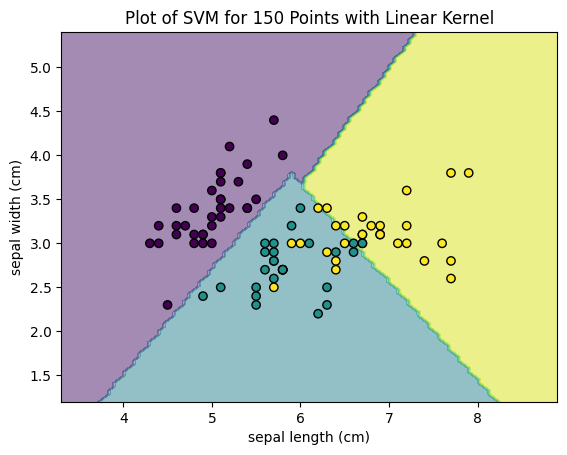

Training Accuracy: 0.8444444444444444
Test Accuracy: 0.6833333333333333


In [222]:
#get all 150 data 
x_data = data.data
y_data = data.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

#continue to use only first two dimensions
x_train2d = np.array([i[:2] for i in x_train])
x_test2d = np.array([i[:2] for i in x_test])

#train model
#choose large C for hard-margin
svm_model = SVC(kernel='linear', C=2**32).fit(x_train2d, y_train)

#plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(svm_model, x_train2d, response_method='predict', xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)
disp.ax_.scatter(x_train2d[:,0], x_train2d[:,1], c=y_train, edgecolors='k')
plt.title("Plot of SVM for 150 Points with Linear Kernel")
plt.show()

#compute accuracy
#compute training accuracy
y_pred = svm_model.predict(x_train2d)
train_score = accuracy_score(y_train, y_pred)

#compute test accuracy
y_pred = svm_model.predict(x_test2d)
test_score = accuracy_score(y_test, y_pred)

#print values
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

The plot above demonstrates that the data is not linearly separable. We can use a non-linear kernel instead.

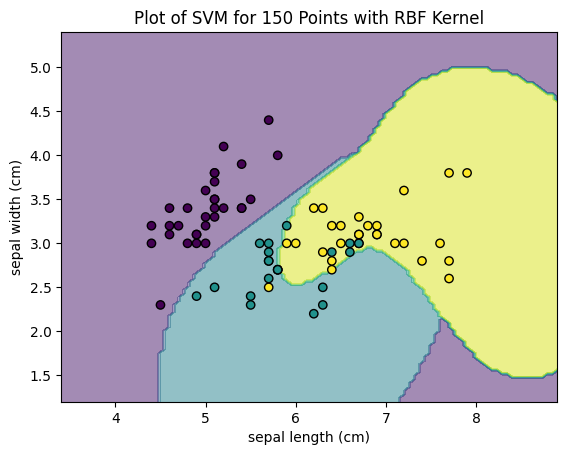

Training Accuracy: 0.8875
Test Accuracy: 0.7
Best Hyperparameter C: 400


In [223]:
#create SVM with polynomial kernel
#tune C hyperparameter
#Use 70/30 training/validation split
x_val2d = x_train2d[:10]
x_train2d = x_train2d[10:]
y_val = y_train[:10]
y_train = y_train[10:]

max_score = -1
max_c = -1
for c in range(100, 2001, 100):
    svm_model = SVC(kernel='rbf', degree=3, gamma='auto', C=c).fit(x_train2d, y_train)
    y_pred = svm_model.predict(x_val2d)
    val_score = accuracy_score(y_val, y_pred)
    
    if val_score > max_score:
        max_score = val_score
        max_c = c
        
#recreate svm_model with best c
svm_model = SVC(kernel='rbf', degree=3, gamma='auto', C=max_c).fit(x_train2d, y_train)

#plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(svm_model, x_train2d, response_method='predict', xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)
disp.ax_.scatter(x_train2d[:,0], x_train2d[:,1], c=y_train, edgecolors='k')
plt.title("Plot of SVM for 150 Points with RBF Kernel")
plt.show()

#compute accuracy
#compute training accuracy
y_pred = svm_model.predict(x_train2d)
train_score = accuracy_score(y_train, y_pred)

#compute test accuracy
y_pred = svm_model.predict(x_test2d)
test_score = accuracy_score(y_test, y_pred)

#print values
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Best Hyperparameter C:", max_c)

To improve the model, I chose to use a radial basis function (RBF) kernel and to tune the hyperparameter for slack. Of the 100 training points, I used 10 for validation to optimize the hyperparameter C. By doing a parameter sweep in increments of 100 from 100 to 2000, C was optimized to be 400. This gives an improved training and test accuracy compared to the hard-margin attempt using a linear kernel.

I tried optimizing C by trying values as large as 100000, but noticed that the model overfit severely thus causing poor test accuracy. Therefore I reduced C accordingly.